In [10]:
import xarray as xr
import zarr
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

store = zarr.ABSStore(container='mycontainer', prefix='zarrstoreall',account_name='ihesp', blob_service_kwargs={'is_emulated': False})


ds = xr.open_zarr(store=store, consolidated=True)

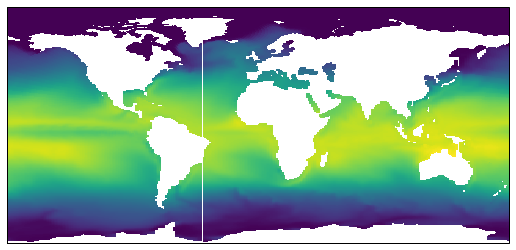

In [11]:
plt.figure(figsize=(9,5));
ax = plt.axes(projection=ccrs.PlateCarree());

lon = ds.TLONG.values
lat = ds.TLAT.values

var = ds.TEMP.isel(time=0,z_t=0).where(ds.TLONG>0,drop=True)

ax.pcolormesh(lon,lat,var,transform=ccrs.PlateCarree());